Ford-Fulkerson Algorithm



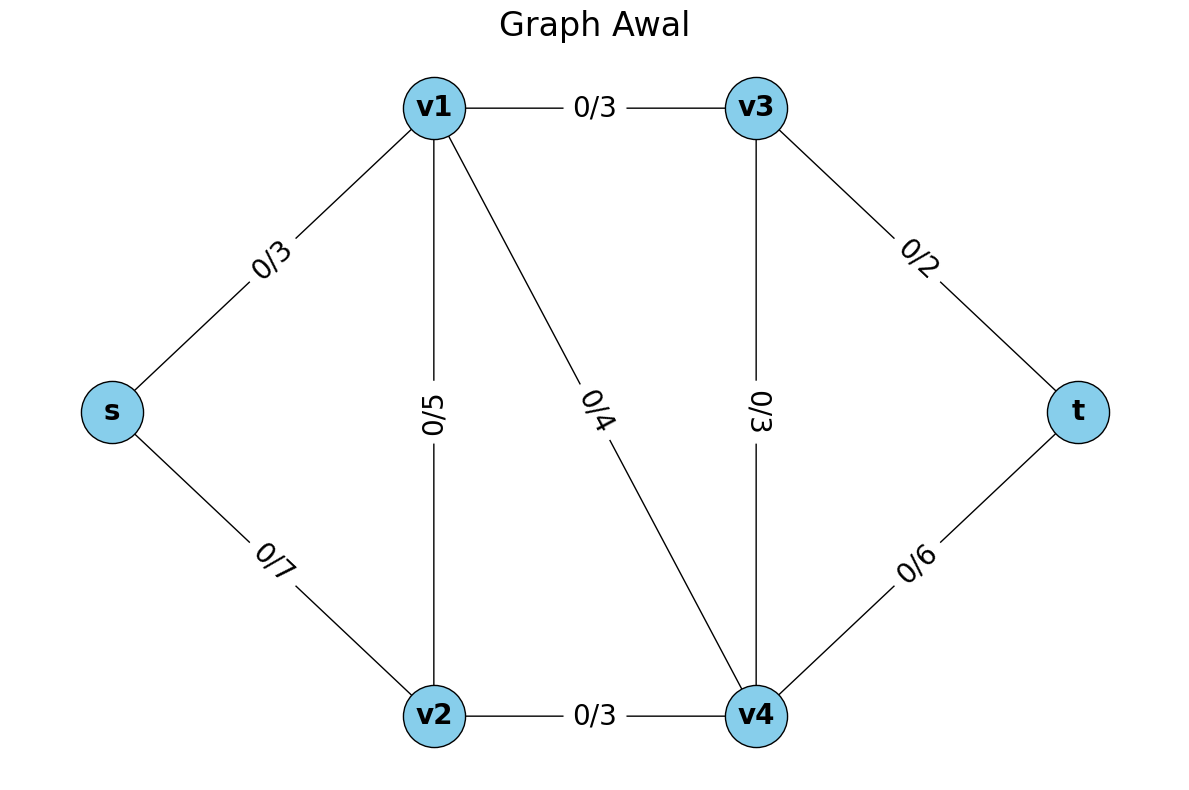

Step 1: Path: s → v1 → v3 → v4 → t, Flow Ditambahkan: 3


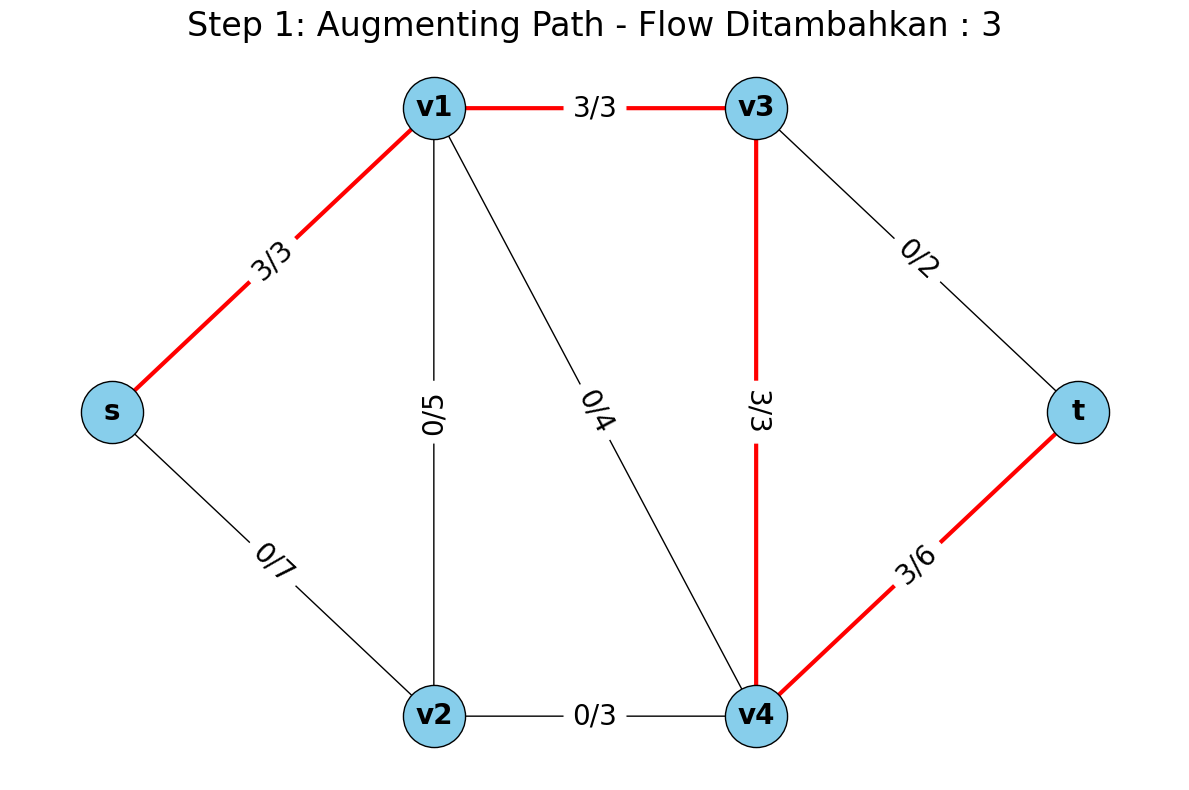

Step 2: Path: s → v2 → v1 → v4 → v3 → t, Flow Ditambahkan: 2


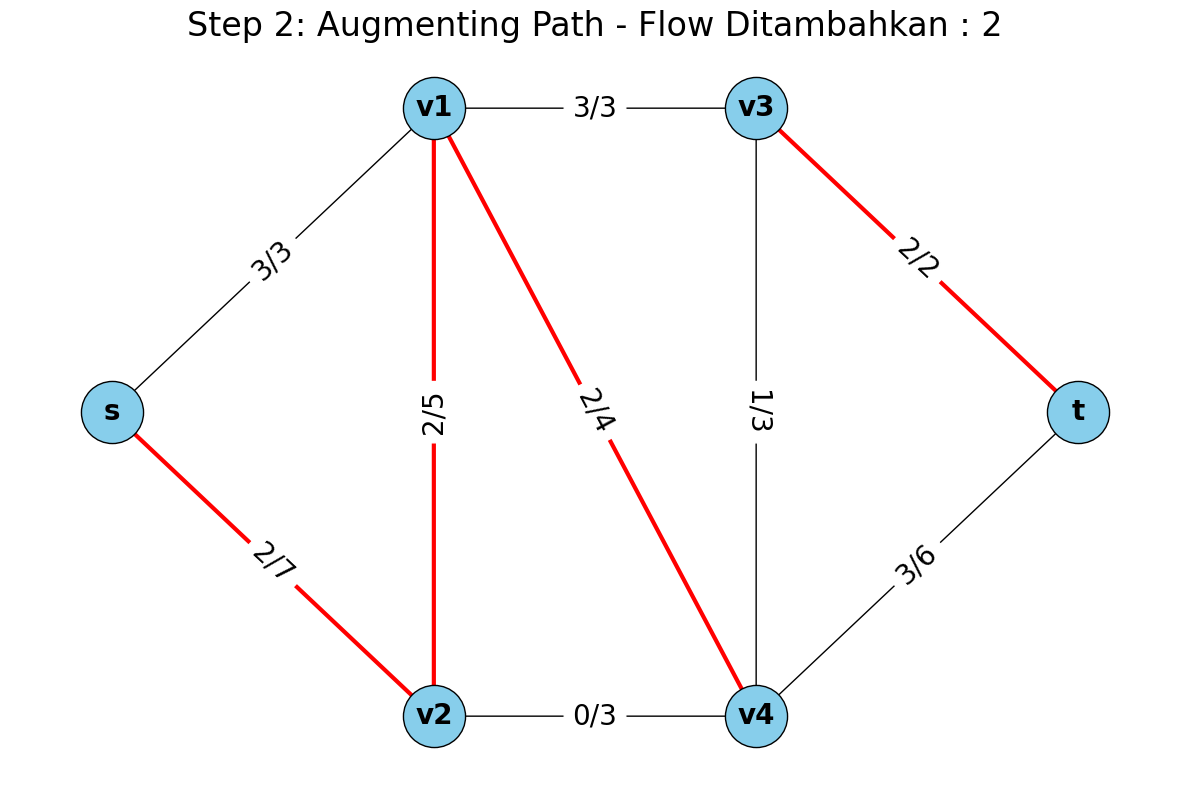

Step 3: Path: s → v2 → v1 → v4 → t, Flow Ditambahkan: 2


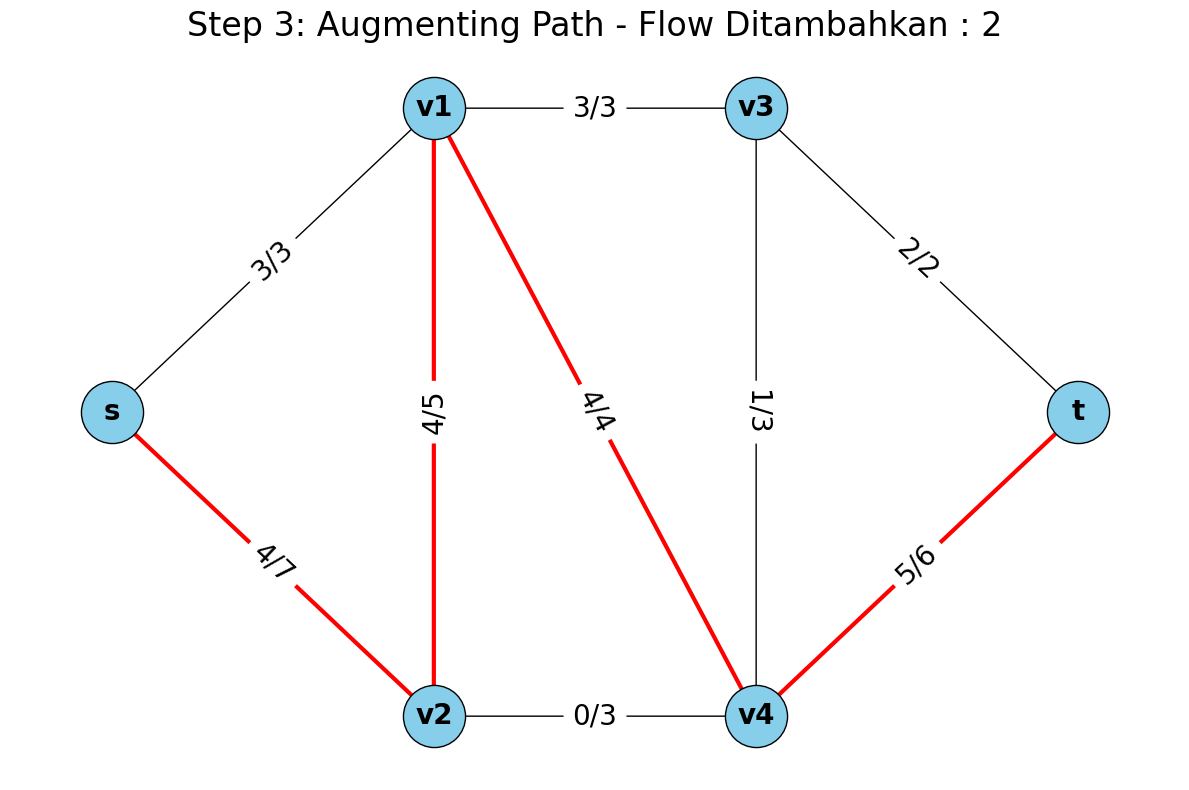

Step 4: Path: s → v2 → v4 → t, Flow Ditambahkan: 1


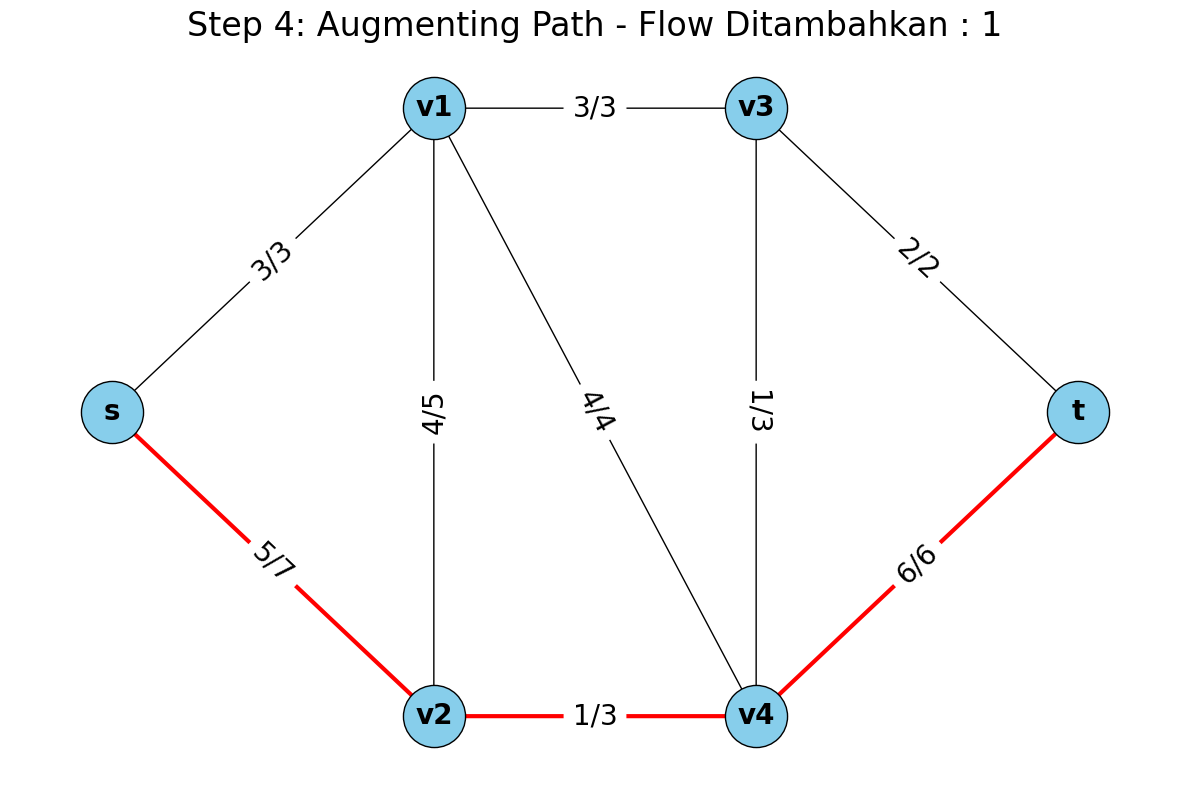


Maximum Flow: 8


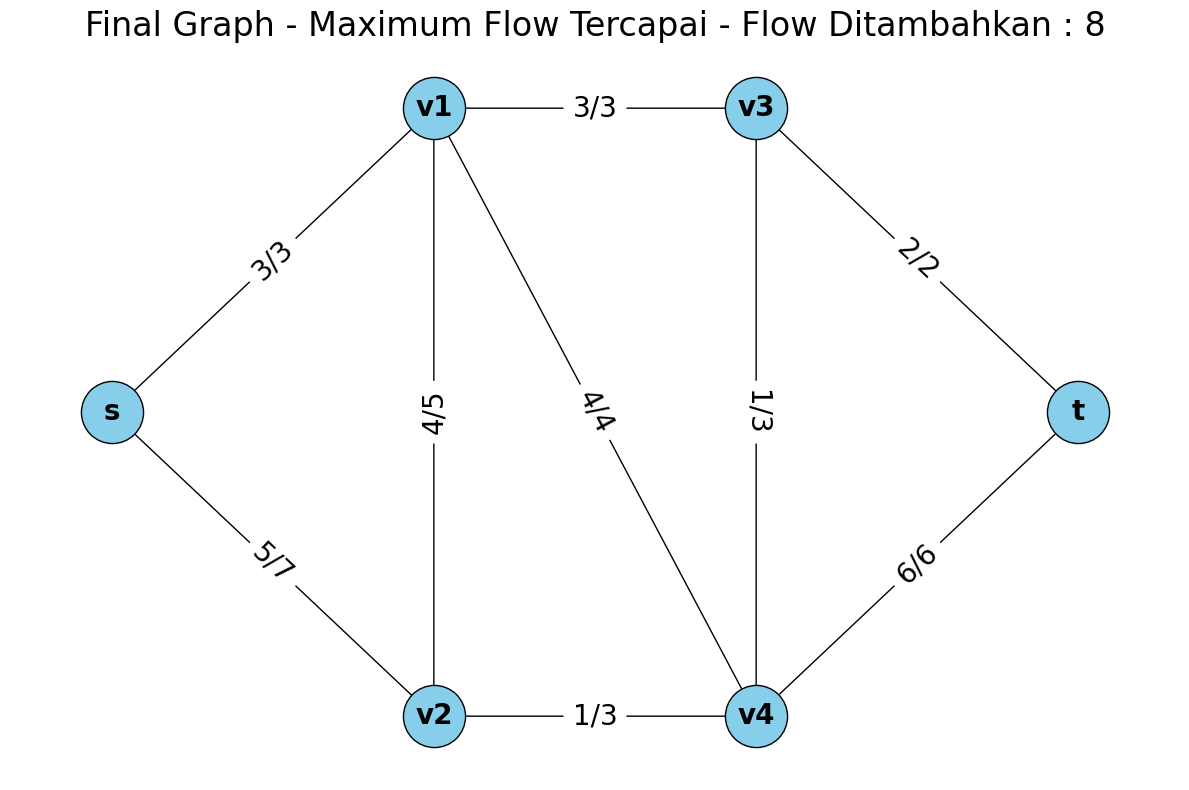

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import gridspec

class VisualGraph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size
        self.flow_matrix = [[0] * size for _ in range(size)]
        self.G = nx.DiGraph()
        self.steps = []  # menyimpan step ( augmented path ) untuk visualisasi

    def add_edge(self, u, v, c):
        self.adj_matrix[u][v] = c
        self.G.add_edge(self.vertex_data[u], self.vertex_data[v], capacity=c, flow=0)

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data
            self.G.add_node(data)

    def dfs(self, s, t, visited=None, path=None):
        if visited is None:
            visited = [False] * self.size
        if path is None:
            path = []

        visited[s] = True
        path.append(s)

        if s == t:
            return path

        for ind, val in enumerate(self.adj_matrix[s]):
            if not visited[ind] and val > 0:
                result_path = self.dfs(ind, t, visited, path.copy())
                if result_path:
                    return result_path

        return None

    def visualize_step(self, title, highlight_path=None, flow_added=None):
        plt.figure(figsize=(12, 8))
        pos = {'s': (0, 1), 'v1': (1, 2), 'v2': (1, 0),
               'v3': (2, 2), 'v4': (2, 0), 't': (3, 1)}

        # draw node
        nx.draw_networkx_nodes(self.G, pos, node_size=2000, node_color='skyblue', edgecolors='black')

        # draw edges
        edge_colors = []
        edge_widths = []
        for u, v in self.G.edges():
            if highlight_path and (u, v) in highlight_path:
                edge_colors.append('red')
                edge_widths.append(3)
            else:
                edge_colors.append('black')
                edge_widths.append(1)

        nx.draw_networkx_edges(self.G, pos, edge_color=edge_colors, width=edge_widths,
                             arrowstyle='->', arrowsize=20)

        # edge labels (flow/capacity)
        edge_labels = {}
        for u, v, data in self.G.edges(data=True):
            edge_labels[(u, v)] = f"{data['flow']}/{data['capacity']}"
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels, font_size=20)

        # node labels
        nx.draw_networkx_labels(self.G, pos, font_size=20, font_weight='bold')

        # title with flow information
        full_title = title
        if flow_added is not None:
            full_title += f" - Flow Ditambahkan : {flow_added}"
        plt.title(full_title, fontsize=24)

        plt.axis('off')
        plt.tight_layout()
        self.steps.append(plt.gcf())
        plt.show()

    def fordFulkerson(self, source, sink):
        max_flow = 0
        self.visualize_step("Graph Awal")

        path = self.dfs(source, sink)
        step = 1

        while path:
            path_flow = float("Inf")
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                path_flow = min(path_flow, self.adj_matrix[u][v])

            # highlight path dari edges
            path_edges = [(self.vertex_data[path[i]], self.vertex_data[path[i+1]])
                         for i in range(len(path)-1)]

            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                self.adj_matrix[u][v] -= path_flow
                self.adj_matrix[v][u] += path_flow

                # Update flow in visualization graph
                if self.G.has_edge(self.vertex_data[u], self.vertex_data[v]):
                    self.G[self.vertex_data[u]][self.vertex_data[v]]['flow'] += path_flow
                else:
                    self.G[self.vertex_data[v]][self.vertex_data[u]]['flow'] -= path_flow

            max_flow += path_flow

            path_names = [self.vertex_data[node] for node in path]
            print(f"Step {step}: Path: {' → '.join(path_names)}, Flow Ditambahkan: {path_flow}")
            self.visualize_step(f"Step {step}: Augmenting Path", highlight_path=path_edges, flow_added=path_flow)
            step += 1

            path = self.dfs(source, sink)

        # graph akhir
        print(f"\nMaximum Flow: {max_flow}")
        self.visualize_step("Final Graph - Maximum Flow Tercapai", flow_added=max_flow)
        return max_flow

# inisiasi untuk membuat graph dan visualsisasi
print("Ford-Fulkerson Algorithm\n")
g = VisualGraph(6)
vertex_names = ['s', 'v1', 'v2', 'v3', 'v4', 't']
for i, name in enumerate(vertex_names):
    g.add_vertex_data(i, name)

# menambahkan edges dam capacitynya
g.add_edge(0, 1, 3)  # s → v1
g.add_edge(0, 2, 7)  # s → v2
g.add_edge(1, 3, 3)  # v1 → v3
g.add_edge(1, 4, 4)  # v1 → v4
g.add_edge(2, 1, 5)  # v2 → v1
g.add_edge(2, 4, 3)  # v2 → v4
g.add_edge(3, 4, 3)  # v3 → v4
g.add_edge(3, 5, 2)  # v3 → t
g.add_edge(4, 5, 6)  # v4 → t

max_flow = g.fordFulkerson(0, 5)

In [15]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, c):
        self.adj_matrix[u][v] = c

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dfs(self, s, t, visited=None, path=None):
        if visited is None:
            visited = [False] * self.size
        if path is None:
            path = []

        visited[s] = True
        path.append(s)

        if s == t:
            return path

        for ind, val in enumerate(self.adj_matrix[s]):
            if not visited[ind] and val > 0:
                result_path = self.dfs(ind, t, visited, path.copy())
                if result_path:
                    return result_path

        return None

    def fordFulkerson(self, source, sink):
        max_flow = 0

        path = self.dfs(source, sink)
        while path:
            path_flow = float("Inf")
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                path_flow = min(path_flow, self.adj_matrix[u][v])

            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                self.adj_matrix[u][v] -= path_flow
                self.adj_matrix[v][u] += path_flow

            max_flow += path_flow

            path_names = [self.vertex_data[node] for node in path]
            print("Path:", " -> ".join(path_names), ", Flow:", path_flow)

            path = self.dfs(source, sink)

        return max_flow

g = Graph(6)
vertex_names = ['s', 'v1', 'v2', 'v3', 'v4', 't']
for i, name in enumerate(vertex_names):
    g.add_vertex_data(i, name)

g.add_edge(0, 1, 3)  # s  -> v1, cap: 3
g.add_edge(0, 2, 7)  # s  -> v2, cap: 7
g.add_edge(1, 3, 3)  # v1 -> v3, cap: 3
g.add_edge(1, 4, 4)  # v1 -> v4, cap: 4
g.add_edge(2, 1, 5)  # v2 -> v1, cap: 5
g.add_edge(2, 4, 3)  # v2 -> v4, cap: 3
g.add_edge(3, 4, 3)  # v3 -> v4, cap: 3
g.add_edge(3, 5, 2)  # v3 -> t,  cap: 2
g.add_edge(4, 5, 6)  # v4 -> t,  cap: 6

source = 0; sink = 5

print("Maximum Flow %d " % g.fordFulkerson(source, sink))

Path: s -> v1 -> v3 -> v4 -> t , Flow: 3
Path: s -> v2 -> v1 -> v4 -> v3 -> t , Flow: 2
Path: s -> v2 -> v1 -> v4 -> t , Flow: 2
Path: s -> v2 -> v4 -> t , Flow: 1
Maximum Flow 8 
